In [1]:
import plotly.graph_objects as go

# HODP colors
monochrome_colors = ['#251616', '#760000', '#C63F3F', '#E28073', '#F1D3CF']
primary_colors = ['#C63F3F', '#F4B436', '#83BFCC', '#455574', '#E2DDDB']

# HODP template
theme_hodp = go.layout.Template(
    layout=go.Layout(
        title = {'font':{'size':24, 'family':"Helvetica", 'color':monochrome_colors[0]}, 'pad':{'t':100, 'r':0, 'b':0, 'l':0}},
        font = {'size':18, 'family':'Helvetica', 'color':'#717171'},
        xaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'showline': True,
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'automargin': True
                },
        yaxis = {'ticks': "outside",
                'tickfont': {'size': 14, 'family':"Helvetica"},
                'showticksuffix': 'all',
                'showtickprefix': 'last',
                'title':{'font':{'size':18, 'family':'Helvetica'}, 'standoff':20},
                'showline': True,
                'automargin': True
                },
        legend = {'bgcolor':'rgba(0,0,0,0)', 
                'title':{'font':{'size':18, 'family':"Helvetica", 'color':monochrome_colors[0]}}, 
                'font':{'size':14, 'family':"Helvetica"}, 
                'yanchor':'bottom'
                },
        colorscale = {'diverging':monochrome_colors},
        coloraxis = {'autocolorscale':True, 
                'cauto':True, 
                'colorbar':{'tickfont':{'size':14,'family':'Helvetica'}, 'title':{'font':{'size':18, 'family':'Helvetica'}}},
                }
    )
)

import pandas as pd
import numpy as np
joesdf = pd.read_csv('joes.csv')
ottosdf = pd.read_csv('ottos.csv')
pinodf = pd.read_csv('pinocchios.csv')
jefesdf = pd.read_csv('eljefes.csv')
felipesdf = pd.read_csv('felipes.csv')


joesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
ottosdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
pinodf.rename(columns={'time ago (years)': 'time'}, inplace=True)
jefesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)
felipesdf.rename(columns={'time ago (years)': 'time'}, inplace=True)

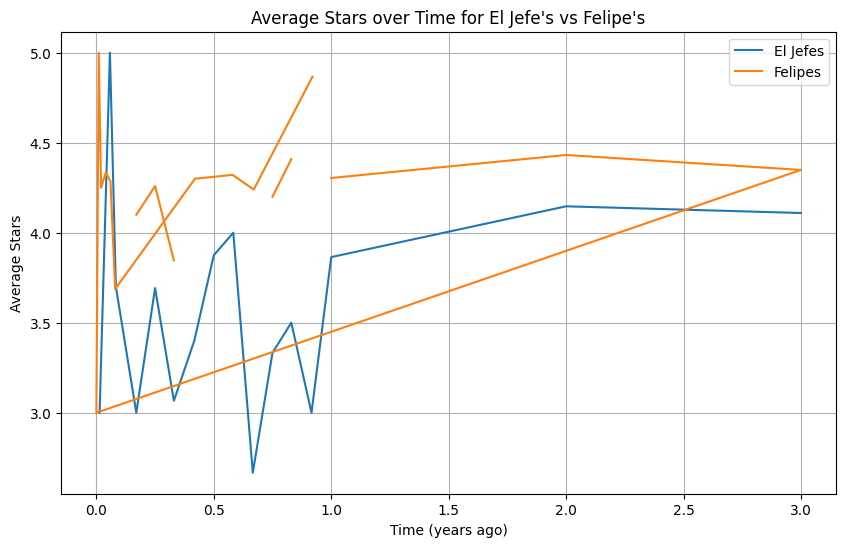

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

filtered_jefesdf = jefesdf[jefesdf['time'] <= 3]
filtered_felipesdf = felipesdf[felipesdf['time'] <= 3]

avg_stars_jefes = filtered_jefesdf.groupby('time')['stars'].mean().reset_index()
filtered_felipesdf['time'] = filtered_felipesdf['time'].round(2)
avg_stars_felipes = filtered_felipesdf.groupby('time')['stars'].mean().reset_index()
merged_data = pd.merge(avg_stars_jefes, avg_stars_felipes, on='time', how='outer', suffixes=('_r1', '_r2'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_data['time'], merged_data['stars_r1'], label='El Jefes')
plt.plot(merged_data['time'], merged_data['stars_r2'], label='Felipes')

# Labeling the graph
plt.xlabel('Time (years ago)')
plt.ylabel('Average Stars')
plt.title("Average Stars over Time for El Jefe's vs Felipe's")
plt.legend()
plt.grid(True)
plt.show()

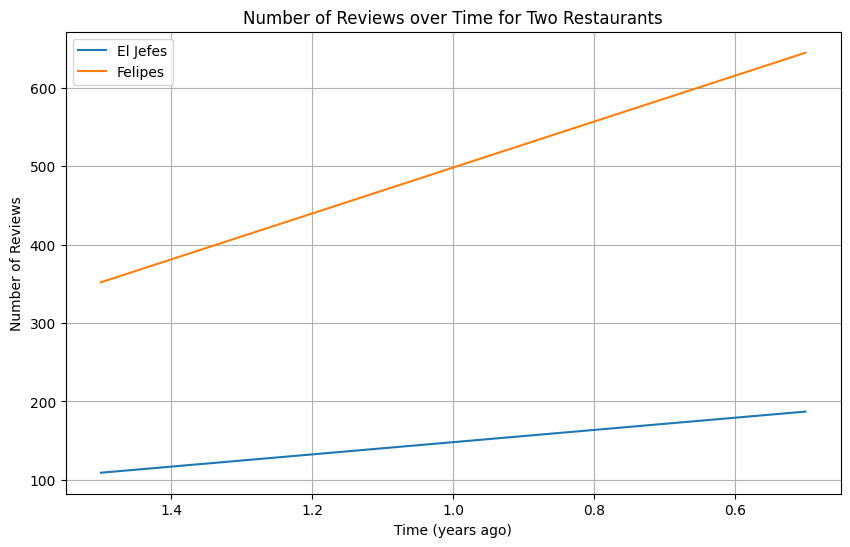

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming jefesdf and felipesdf are your initial DataFrames

# Define your bins
bins = [0, 1, 2]

# Bin data and create a new column for the binned values
jefesdf['time_bin'] = pd.cut(jefesdf['time'], bins)
felipesdf['time_bin'] = pd.cut(felipesdf['time'], bins)

def get_interval_midpoint(interval):
    return (interval.left + interval.right) / 2

jefesdf['time_bin_midpoint'] = jefesdf['time_bin'].apply(get_interval_midpoint)
felipesdf['time_bin_midpoint'] = felipesdf['time_bin'].apply(get_interval_midpoint)

review_count_jefes = jefesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')
review_count_felipes = felipesdf.groupby('time_bin_midpoint').size().reset_index(name='review_count')

merged_reviews = pd.merge(review_count_jefes, review_count_felipes, on='time_bin_midpoint', how='outer', suffixes=('_jefes', '_felipes'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_jefes'], label='El Jefes')
plt.plot(merged_reviews['time_bin_midpoint'], merged_reviews['review_count_felipes'], label='Felipes')

plt.gca().invert_xaxis()
plt.xlabel('Time (years ago)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews over Time for Two Restaurants')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Assuming your DataFrame is named df and the column with reviews is named 'reviews'
reviews = jefesdf['text'].astype(str)

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
tokens = []
for review in reviews:
    words = word_tokenize(review)
    tokens.extend([word.lower() for word in words if word.isalpha() and word.lower() not in stop_words])

# Count the frequency of each word
word_counts = Counter(tokens)

# Extracting keywords - you can define a threshold or number to limit the list
threshold = 3
keywords = sorted([(word, count) for word, count in word_counts.items() if count > threshold], key=lambda x: x[1], reverse=True)

print(keywords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[('nan', 346), ('food', 171), ('good', 113), ('great', 102), ('mexican', 82), ('place', 81), ('burrito', 70), ('service', 52), ('best', 49), ('order', 49), ('bowl', 37), ('get', 34), ('like', 33), ('staff', 33), ('love', 32), ('go', 32), ('tacos', 31), ('always', 31), ('delicious', 30), ('burritos', 28), ('really', 27), ('ordered', 27), ('one', 26), ('got', 25), ('friendly', 23), ('breakfast', 23), ('harvard', 23), ('square', 23), ('late', 22), ('open', 21), ('chipotle', 20), ('hot', 20), ('fresh', 20), ('recommend', 20), ('quick', 20), ('amazing', 19), ('price', 18), ('people', 18), ('better', 18), ('never', 18), ('spot', 18), ('also', 18), ('area', 18), ('fast', 17), ('authentic', 16), ('give', 16), ('taco', 16), ('would', 15), ('options', 15), ('much', 15), ('pretty', 1

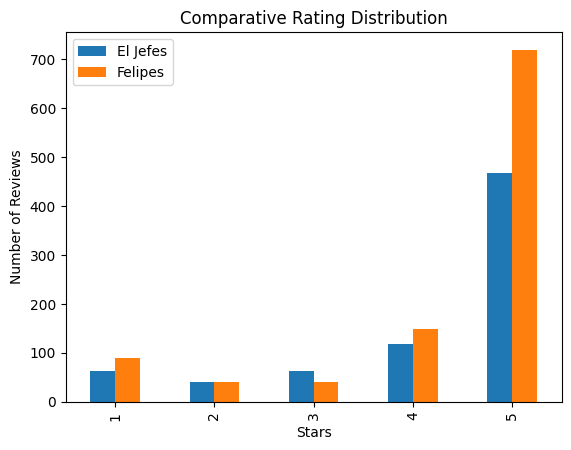

In [5]:
jefesdist = jefesdf['stars'].value_counts().sort_index()
felipesdist = felipesdf['stars'].value_counts().sort_index()

# Combine distributions into a single DataFrame
combined_distribution = pd.DataFrame({'El Jefes': jefesdist,
                                      'Felipes': felipesdist})

# Plotting side-by-side
combined_distribution.plot(kind='bar')
plt.title('Comparative Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.show()




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d650185-6946-4ac8-95e9-ae296e150553' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>